# Practice-case Machine Learning

### Name: Ramzy Mohammad<BR>
### IYKRA DATA FELLOWSHIP BATCH 6

## Scenario

This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. Please answer the question below and explore your creativity.

Some goals of this project:
1.	What items customers buy the most and are there any items we should ignore?
2.	What is our strategy to increase sales based on our export destination countries?
3.	Do customer segmentation appropriately. Please explain in detail and completely
4.	Get the hidden insight from the data


You can access the dataset: https://github.com/Syukrondzeko/Fellowship

dataset's features:
- Kode_Bayar
- Kode_Barang
- Barang
- Jumlah
- Tanggal_Transaksi
- Harga_satuan
- Kode_Pelanggan
- Negara



# 1. Import Package

In [16]:
import pandas as pd
import numpy as np

# 2. Load Dataset

In [17]:
dfa = pd.read_csv('ML_2_Fellow.csv')

In [18]:
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


# 3. Data Preprocessing

In [19]:
# remove duplicate value
df.drop_duplicates(inplace=True)

In [20]:
# Check missing value
df.isna().sum()

Kode_Bayar                0
Kode_Barang            5989
Barang                 7443
Jumlah                 5989
Tanggal_Transaksi      5989
Harga_Satuan           5989
Kode_Pelanggan       138638
Negara                 5989
dtype: int64

In [21]:
# Cleaning feature Kode_Barang
df = df[df.Kode_Barang != 'DOT']
df = df[df.Kode_Barang != 'D']
df = df[df.Kode_Barang != 'POST']

In [22]:
# handling feature Barang
a = df[df['Barang'].isnull()].reset_index()

In [23]:
a

,index,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,622,536414,22139,NaN,56.0,12/1/2010 11:52,0.0,NaN,United Kingdom
3,871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7433,541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7434,541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7435,541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7436,541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# remove data in 'a' dataframe by index from 'df' dataframe
index_hapus = a['index'].to_list()

In [25]:
df = df.drop(index_hapus)

In [26]:
# making a dataframe 'n' and trying to extract value from feature kode_bayar in 'a' dataframe

n = pd.DataFrame(columns=['Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi', 'Harga_Satuan', 'Kode_Pelanggan', 'Negara' ])

In [27]:
n['Kode_Bayar'] = a['Kode_Bayar'].str.split(',').str[0]
n['Kode_Barang'] = a['Kode_Bayar'].str.split(',').str[1]
n['Negara'] = a['Kode_Bayar'].str.split(',').str[-1]
n['Kode_Pelanggan'] = a['Kode_Bayar'].str.split(',').str[-2]
n['Harga_Satuan'] = a['Kode_Bayar'].str.split(',').str[-3]
n['Tanggal_Transaksi'] = a['Kode_Bayar'].str.split(',').str[-4]
n['Barang'] = a['Kode_Bayar'].str.split('"').str[1]
n['Jumlah'] = a['Kode_Bayar'].str.split(',').str[-5]

In [28]:
n

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.1,15311,United Kingdom
1,536394,21506,"FANCY FONT BIRTHDAY CARD,",24,12/1/2010 10:39,0.42,13408,United Kingdom
2,536414,NaN,NaN,NaN,NaN,NaN,NaN,536414
3,536477,22041,RECORD FRAME 7,48,12/1/2010 12:27,2.1,16210,United Kingdom
4,536520,22760,"TRAY, BREAKFAST IN BED",1,12/1/2010 12:43,12.75,14729,United Kingdom
...,...,...,...,...,...,...,...,...
7433,581498,22041,RECORD FRAME 7,2,12/9/2011 10:26,5.79,,United Kingdom
7434,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,12985,United Kingdom
7435,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,14422,United Kingdom
7436,581538,85071C,CHARLIE+LOLA,1,12/9/2011 11:34,0.39,14446,United Kingdom


In [29]:
# merging dataframe 'df' with dataframe 'n'

df_baru = df.append(n)

In [30]:
# getting new dataframe 'df_baru'
df_baru

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
7433,581498,22041,RECORD FRAME 7,2,12/9/2011 10:26,5.79,,United Kingdom
7434,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,12985,United Kingdom
7435,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,14422,United Kingdom
7436,581538,85071C,CHARLIE+LOLA,1,12/9/2011 11:34,0.39,14446,United Kingdom


In [32]:
df_baru = df_baru.reset_index()

In [34]:
df_baru.drop(columns=['index'], inplace=True)

In [36]:
# try to clean feature Barang from dataframe 'df_baru': remove null value in feature Barang 
b = df_baru[df_baru['Barang'].isnull()].reset_index()

In [37]:
index_hapus = b['index'].to_list()

In [38]:
df_baru = df_baru.drop(index_hapus)

In [39]:
df_baru.isna().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                    0
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       130446
Negara                    0
dtype: int64

In [40]:
# handling feature kode_pelanggan and removing null value in kode_barang from 'df_baru' dataframe

# c = df[df['Kode_Pelanggan'].isnull()].reset_index()

In [41]:
df_baru = df_baru.dropna(subset=['Kode_Pelanggan'])
df_baru.isnull().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

In [42]:
# Converting type of data from some features

df_baru["Jumlah"] = df_baru["Jumlah"].astype(float, errors = 'raise')
df_baru["Harga_Satuan"] = df_baru["Harga_Satuan"].astype(float, errors = 'raise')
df_baru[["Tanggal_Transaksi"]] = df_baru[["Tanggal_Transaksi"]].apply(pd.to_datetime)

In [43]:
# handling feature jumlah: remove negative value from feature Jumlah
df_baru = df_baru[df_baru['Jumlah'] > 0]

In [44]:
df_baru.drop_duplicates(inplace=True)

In [46]:
# handling feature kode barang: remove M value from feature kode_barang
z = df_baru[df_baru['Kode_Barang']=='M']

In [47]:
df_baru = df_baru.drop(z.index)

In [48]:
# handling feature harga_satuan: removing negative and zero value from feature Harga_Satuan
df_baru = df_baru[df_baru['Harga_Satuan'] > 0]

In [59]:
# there are some blank value in feature Kode_Pelanggan, so i try to replace balnk value to NaN value and removing it

df_baru["Kode_Pelanggan"].replace({"": np.nan}, inplace=True)

In [60]:
c = df_baru[df_baru['Kode_Pelanggan'].isnull()]

In [61]:
df_baru = df_baru.drop(c.index)

In [62]:
df_baru

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
534576,581476,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",24.0,2011-12-09 08:48:00,4.25,12433,Norway
534577,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09 09:15:00,2.08,16446,United Kingdom
534591,581496,21462,"NURSERY A,B,C PAINTED LETTERS",8.0,2011-12-09 10:20:00,1.95,16558,United Kingdom
534594,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12.0,2011-12-09 10:46:00,3.95,12985,United Kingdom


# QUESTION 1
## What items customers buy the most and are there any items we should ignore?


In [122]:
df_baru.groupby(by=['Kode_Barang']).sum().sort_values(by=['Jumlah'], ascending=False)
df_baru[df_baru['Kode_Barang']=='23843'].iloc[0]['Barang']

'PAPER CRAFT , LITTLE BIRDIE'

**The most purchased items is `PAPER CRAFT , LITTLE BIRDIE`**

In [109]:
min = df_baru[['Harga_Satuan', 'Kode_Pelanggan']].groupby(by=['Harga_Satuan']).count().sort_values(by=['Kode_Pelanggan'])
min[min['Kode_Pelanggan']==1]

,Kode_Pelanggan
Harga_Satuan,
1.01,1
5.13,1
5.14,1
2.22,1
5.17,1
...,...
1.60,1
8.12,1
1.71,1


**The most avoided items for export is the item that has the least number of customers and smallest unit price. So the most avoied item are in list below:**

In [118]:
barang = []
for i in min[min['Kode_Pelanggan']==1].index:
    barang.append(df_baru[df_baru['Harga_Satuan'] == i].iloc[0][2])
barang  

['FRENCH BLUE METAL DOOR SIGN No',
 'SET OF TEA COFFEE SUGAR TINS PANTRY',
 'SPOTTY BUNTING',
 'FOUR HOOK  WHITE LOVEBIRDS',
 'SET OF TEA COFFEE SUGAR TINS PANTRY',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'PARISIENNE JEWELLERY DRAWER ',
 'JUMBO BAG RED RETROSPOT',
 'RECIPE BOX PANTRY YELLOW DESIGN',
 'VINTAGE UNION JACK MEMOBOARD',
 'RECIPE BOX PANTRY YELLOW DESIGN',
 'IVORY SHELL HEART NECKLACE',
 'SET 6 SCHOOL MILK BOTTLES IN CRATE',
 'BROCANTE COAT RACK',
 'LUNCH BOX I LOVE LONDON',
 'BICYCLE PUNCTURE REPAIR KIT ',
 'FELTCRAFT DOLL MOLLY',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'SET/3 RED GINGHAM ROSE STORAGE BOX',
 'WOOD BLACK BOARD ANT WHITE FINISH',
 'PAINTED METAL PEARS ASSORTED',
 'COLOURED GLASS STAR T-LIGHT HOLDER',
 'SWEETHEART BIRD HOUSE',
 'JAM MAKING SET WITH JARS',
 'FIRST AID TIN',
 'MEMO BOARD RETROSPOT  DESIGN',
 'TV DINNER TRAY AIR HOSTESS ',
 'SMALL IVORY HEART WALL ORGANISER',
 'WALL ART THE MAGIC FOREST ',
 'CHILLI LIGHTS',
 'PANTRY ROLLING PIN',
 'VINTAGE CREAM C

# QUESTION 2

1. Your export position                                              
- Be clear about your reasons for exporting
- Identify the particular risks you need to address
- Decide how aggressively you want to pursue opportunities

2. Export action plan
- Decide where you should focus your efforts
- Establish your objectives and budgets
- Plan how you will manage your exports

3. Research overseas markets
- Find out what you can about export markets from home
- Explore foreign markets in person

4. The legal and tax position
- Find out about the key legal issues in your potential export market
- Prepare a comprehensive sales contract
- Make sure you understand the tax rules

5. Reaching overseas markets
- Take account of local rules and cultural preferences
- Select a channel for selling into the market
- Be clear about how you will deliver your goods

6. Export finance
- Guard yourself against non-payment
- Negotiate a method of payment to reflect the risks that you are running
- Take care about how funds are transferred

# QUESTION 3

**Customer Segmentation : To identify different segments of customers on the basis of their shopping behaviour to run targeted marketing campaign.**

**We will build a RFM feature to identify different customers.**

Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a RFM,*Recency, Frequency and Monetary Value, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:


- `Recency`: The value of how recently a customer purchased at the establishment
- `Frequency`: How frequent the customer’s transactions are at the establishment
- `Monetary value`: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment


**K-MEANS**<br>
k-means is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed apriori. The main idea is to define k centers, one for each cluster. We will use RFM for K-means.<br>

if you are interested in K-means, you can try the simulation: https://stanford.edu/class/engr108/visualizations/kmeans/kmeans.html




In [65]:
df_baru

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
534576,581476,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",24.0,2011-12-09 08:48:00,4.25,12433,Norway
534577,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09 09:15:00,2.08,16446,United Kingdom
534591,581496,21462,"NURSERY A,B,C PAINTED LETTERS",8.0,2011-12-09 10:20:00,1.95,16558,United Kingdom
534594,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12.0,2011-12-09 10:46:00,3.95,12985,United Kingdom


In [66]:
#RFM implementation

# Extracting amount by multiplying quantity and unit price and saving the data into amount variable.
df_baru["Amount"]  = df_baru.Harga_Satuan * df_baru.Jumlah

In [68]:
# Monetary Function

# Finding total amount spent per customer
monetary = df_baru.groupby("Kode_Pelanggan").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,Kode_Pelanggan,Amount
0,12346.0,77183.60
1,12347.0,3764.48
2,12348.0,754.00
3,12349.0,1368.75
4,12350.0,255.30


In [71]:
#Frequency function

# Getting the count of orders made by each customer based on customer ID.
frequency = df_baru.groupby("Kode_Pelanggan").Kode_Bayar.count()
frequency = frequency.reset_index()
frequency.head()

,Kode_Pelanggan,Kode_Bayar
0,12346.0,1
1,12347.0,139
2,12348.0,7
3,12349.0,63
4,12350.0,13


In [72]:
#creating master dataset
master = monetary.merge(frequency, on = "Kode_Pelanggan", how = "inner")
master.head()

,Kode_Pelanggan,Amount,Kode_Bayar
0,12346.0,77183.60,1
1,12347.0,3764.48,139
2,12348.0,754.00,7
3,12349.0,1368.75,63
4,12350.0,255.30,13


In [73]:
# Finding max data
maximum = max(df_baru.Tanggal_Transaksi)

In [74]:
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days = 1)

In [75]:
df_baru['diff'] = maximum - df_baru.Tanggal_Transaksi
df_baru.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [78]:
#Dataframe merging by recency
recency =df_baru.groupby('Kode_Pelanggan').min()['diff']
recency = recency.reset_index()
recency.head()

,Kode_Pelanggan,diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [80]:
#Combining all recency, frequency and monetary parameters
RFM = master.merge(recency, on = "Kode_Pelanggan")
RFM.columns = ['Kode_Pelanggan','Amount','Frequency','Recency']
RFM.head()

,Kode_Pelanggan,Amount,Frequency,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,3764.48,139,2 days 20:58:00
2,12348.0,754.00,7,75 days 23:37:00
3,12349.0,1368.75,63,19 days 02:59:00
4,12350.0,255.30,13,310 days 20:49:00


### Removing Outlier

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

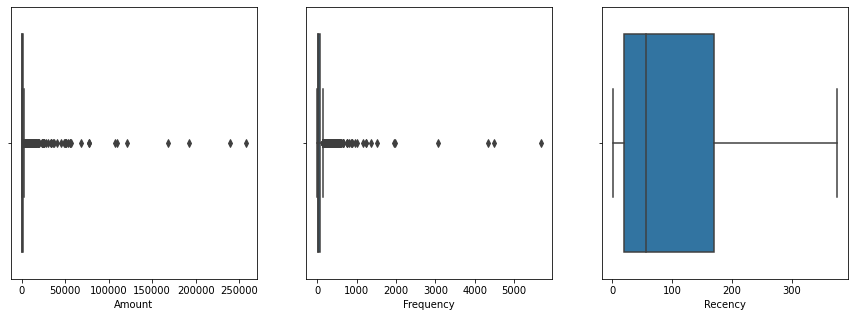

In [85]:
# outlier treatment for Amount
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [86]:
# outlier treatment for Amount
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

In [87]:
# outlier treatment for Frequency
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [88]:
# outlier treatment for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

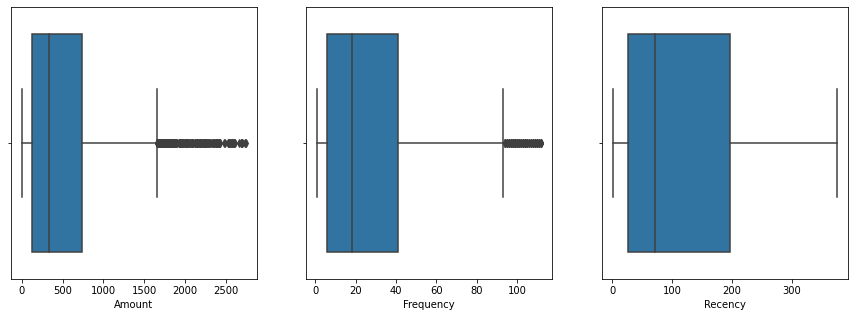

In [89]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [90]:
RFM.head()

,Kode_Pelanggan,Amount,Frequency,Recency
2,12348.0,754.00,7,75 days 23:37:00
3,12349.0,1368.75,63,19 days 02:59:00
4,12350.0,255.30,13,310 days 20:49:00
5,12352.0,1354.74,74,36 days 22:13:00
6,12353.0,89.00,4,204 days 19:03:00


In [91]:
# standardise all parameters
RFM_norm1 = RFM.drop("Kode_Pelanggan", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [92]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,0.404187,-0.754321,-0.382925
1,1.516696,1.324691,-0.899625
2,-0.498307,-0.531570,1.785370
3,1.491342,1.733068,-0.742770
4,-0.799259,-0.865696,0.807330


## **K- Means Clustering**

**Silhouette** score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. For the detail about `Silhouette`: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam  

In [94]:
from sklearn.cluster import KMeans

In [95]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

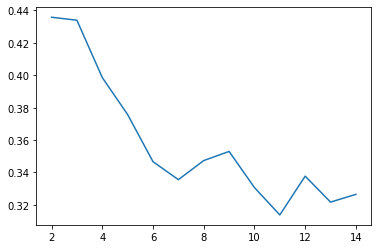

In [96]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

In [98]:
# Kmeans with K=3 because silloute has high score 
model_clus3 = KMeans(n_clusters = 3, max_iter=50)
model_clus3.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'ClusterID']
RFM_km.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12348.0,754.00,7,75 days 23:37:00,2
1,12349.0,1368.75,63,19 days 02:59:00,1
2,12350.0,255.30,13,310 days 20:49:00,0
3,12352.0,1354.74,74,36 days 22:13:00,1
4,12353.0,89.00,4,204 days 19:03:00,0


In [100]:
RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [101]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,216.092282,11.673806,262.043657
1,1,1302.085355,65.658664,53.494781
2,2,345.409502,18.118257,56.165456


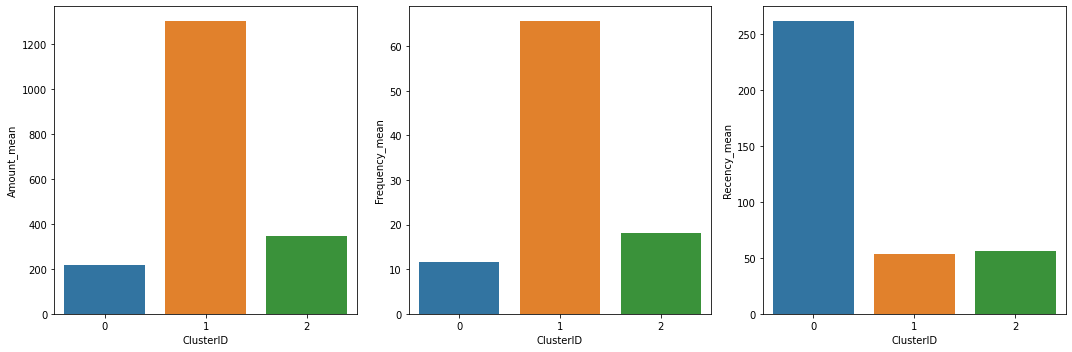

<Figure size 432x288 with 0 Axes>

In [123]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df.ClusterID, y=df.Amount_mean, ax = axs[0])
sns.barplot(x=df.ClusterID, y=df.Frequency_mean, ax = axs[1])
sns.barplot(x=df.ClusterID, y=df.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()
plt.savefig('cakk.png')

- Based on the graph above, ClusterID 1 spends the most money compared to other clusterIDs<br>
- Berdasarkan grafik di atas, ClusterID 2 shopped the most compared to other clusterIDs<br>
- Berdasarkan grafik di atas, ClusterID 3 recently shopped compared to other clusterIDs<br>

# QUESTION 4 

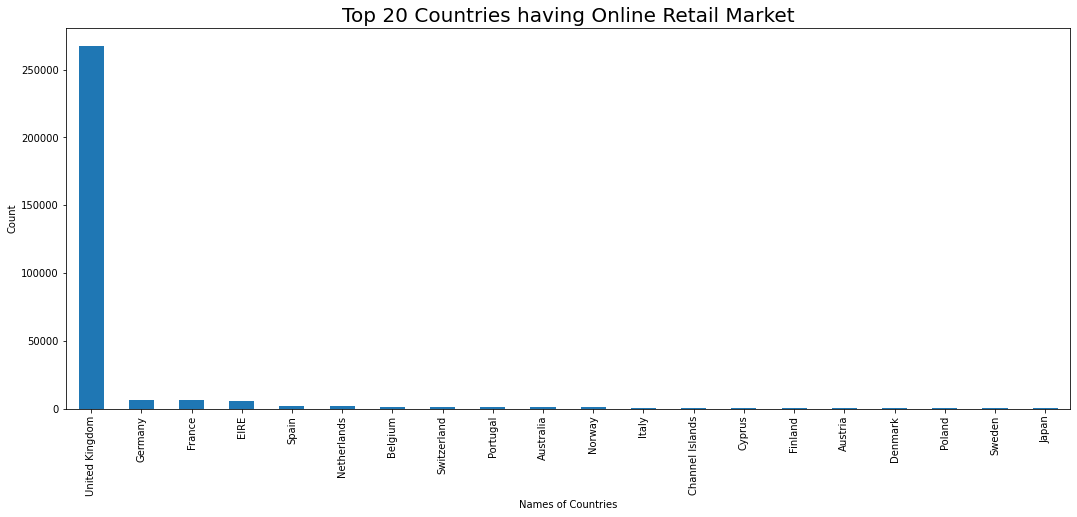

<Figure size 432x288 with 0 Axes>

In [126]:
# checking the different values for country in the dataset

df_baru['Negara'].value_counts().head(20).plot.bar(figsize = (18, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()
plt.savefig('b.jpg')

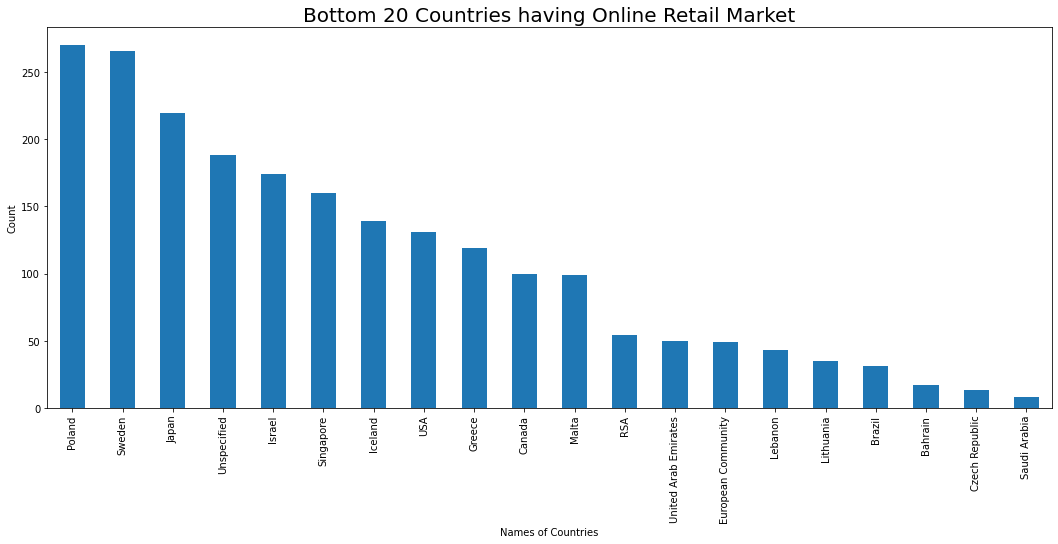

In [104]:
# checking the different values for country in the dataset

df_baru['Negara'].value_counts().tail(20).plot.bar(figsize = (18, 7))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [120]:
df_baru.Tanggal_Transaksi.value_counts()

2011-11-14 15:27:00    488
2011-12-05 17:17:00    479
2011-11-28 15:54:00    476
2011-11-23 13:39:00    393
2011-10-31 14:09:00    380
                      ... 
2011-09-22 15:57:00      1
2011-11-23 15:02:00      1
2011-04-26 12:12:00      1
2011-02-11 17:06:00      1
2011-08-24 16:16:00      1
Name: Tanggal_Transaksi, Length: 16868, dtype: int64